# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Inclinação de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf
import warnings

warnings.filterwarnings("ignore")

In [112]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [113]:
colunas = {'age': 'idade', 'sex': 'sexo', 'cp': 'tipo_dor_peito', 'trestbps': 'pressao_sanguínea_repouso',
    'chol': 'colesterol', 'fbs': 'glicemia_jejum', 'restecg': 'resultados_eletrocardiograma',
    'thalach': 'freq_card_max', 'exang': 'angina_exercicio', 'oldpeak': 'depressao_st_exercicio',
    'slope': 'inclinacao_st_exercicio', 'ca': 'num_vasos_coloridos', 'thal': 'defeito', 'num': 'diagnostico_doenca'}


df.rename(columns=colunas, inplace=True)

In [114]:
df['flag_doente'] = (df['diagnostico_doenca'] != 0).astype('int64')
df['flag_doente'].replace({0:'saudáveis', 1:'doentes'}, inplace = True)
df

,idade,sexo,tipo_dor_peito,pressao_sanguínea_repouso,colesterol,glicemia_jejum,resultados_eletrocardiograma,freq_card_max,angina_exercicio,depressao_st_exercicio,inclinacao_st_exercicio,num_vasos_coloridos,defeito,diagnostico_doenca,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,saudáveis
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,doentes
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,doentes
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,saudáveis
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,saudáveis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,doentes
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,doentes
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,doentes
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,doentes


## 1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [115]:
tab = pd.crosstab(df['sexo'], df['flag_doente'], margins=True, margins_name='total')
df['sexo'].replace({0:'Feminino', 1:'Masculino'}, inplace = True)
tab['média de doentes'] = tab['doentes'] / tab['total']
tab['odds'] = tab['doentes'] / tab['saudáveis']
tab['odds_ratio'] = tab['odds']/tab.loc['total','odds']
tab['logito'] = np.log(tab['odds'])
tab['WOE'] = np.log(tab['odds_ratio'])
tab

flag_doente,doentes,saudáveis,total,média de doentes,odds,odds_ratio,logito,WOE
sexo,,,,,,,,
0.0,25,72,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
1.0,114,92,206,0.553398,1.239130,1.461996,0.214410,0.379802
total,139,164,303,0.458746,0.847561,1.000000,-0.165392,0.000000


## 2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [116]:
bins = [20, 32, 44, 56, 68, 80]
df['idade_categorias'] = pd.cut(df['idade'], bins=bins)
df['idade_categorias'].value_counts()

idade_categorias
(56, 68]    128
(44, 56]    107
(32, 44]     54
(68, 80]     13
(20, 32]      1
Name: count, dtype: int64

In [117]:
tab2 = pd.crosstab(df['idade_categorias'], df['flag_doente'], margins=True, margins_name='total')
tab2['média de doentes'] = tab2['doentes'] / tab2['total']
tab2['odds'] = tab2['doentes'] / tab2['saudáveis']
tab2['odds_ratio'] = tab2['odds']/tab2.loc['total','odds']
tab2['logito'] = np.log(tab2['odds'])
tab2['WOE'] = np.log(tab2['odds_ratio'])
tab2

flag_doente,doentes,saudáveis,total,média de doentes,odds,odds_ratio,logito,WOE
idade_categorias,,,,,,,,
"(20, 32]",0,1,1,0.000000,0.000000,0.000000,-inf,-inf
"(32, 44]",14,40,54,0.259259,0.350000,0.412950,-1.049822,-0.884430
"(44, 56]",41,66,107,0.383178,0.621212,0.732941,-0.476083,-0.310690
"(56, 68]",79,49,128,0.617188,1.612245,1.902217,0.477628,0.643020
"(68, 80]",5,8,13,0.384615,0.625000,0.737410,-0.470004,-0.304611
total,139,164,303,0.458746,0.847561,1.000000,-0.165392,0.000000


## 3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

### Gráficos com a bivariada com a variável sexo:

<Axes: title={'center': 'Saudáveis X doentes por sexo'}, xlabel='Sexo', ylabel='Quantidade'>

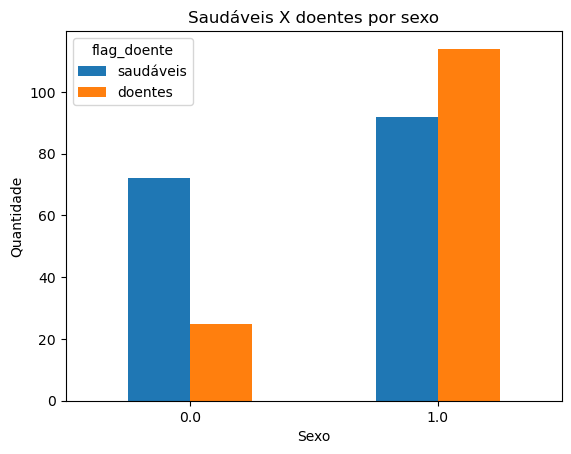

In [118]:
tab[['saudáveis', 'doentes']].plot.bar(title='Saudáveis X doentes por sexo', 
                                       xlabel='Sexo', ylabel='Quantidade', rot=0)

<Axes: title={'center': 'Média de doentes por sexo'}, xlabel='Sexo', ylabel='Porcentagem'>

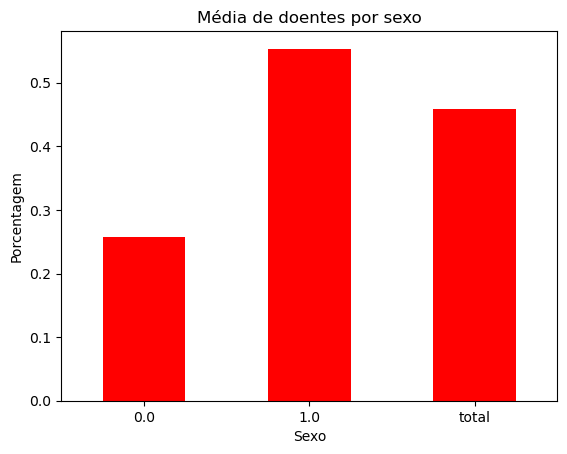

In [124]:
tab['média de doentes'].plot.bar(color= 'red', title='Média de doentes por sexo', 
                                       xlabel='Sexo', ylabel='Porcentagem', rot=0)

<Axes: title={'center': 'Chance de doentes por sexo'}, xlabel='Sexo', ylabel='Quantidade'>

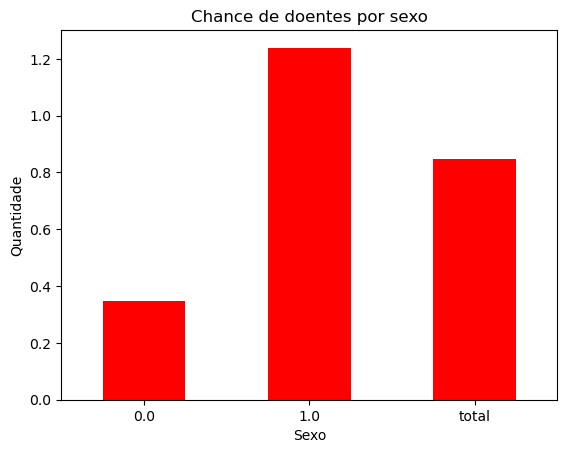

In [120]:
tab['odds'].plot.bar(color= 'red', title='Chance de doentes por sexo', 
                                       xlabel='Sexo', ylabel='Quantidade', rot=0)

### Gráficos com a bivariada com a variável idade:

<Axes: title={'center': 'Saudáveis X doentes por idade'}, xlabel='Idade', ylabel='Quantidade'>

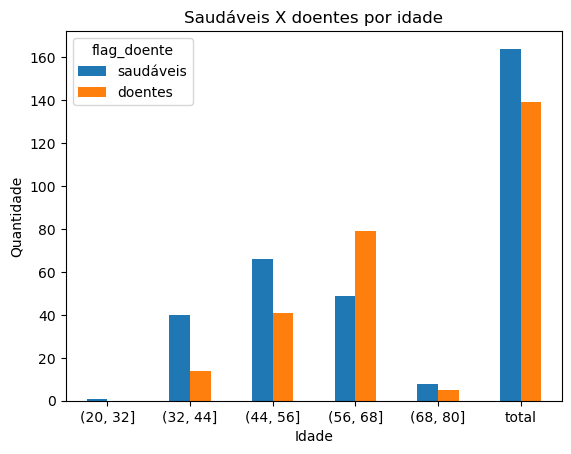

In [123]:
tab2[['saudáveis', 'doentes']].plot.bar(title='Saudáveis X doentes por idade', 
                                       xlabel='Idade', ylabel='Quantidade', rot=0)

<Axes: title={'center': 'Média de doentes por idade'}, xlabel='Idade', ylabel='Porcentagem'>

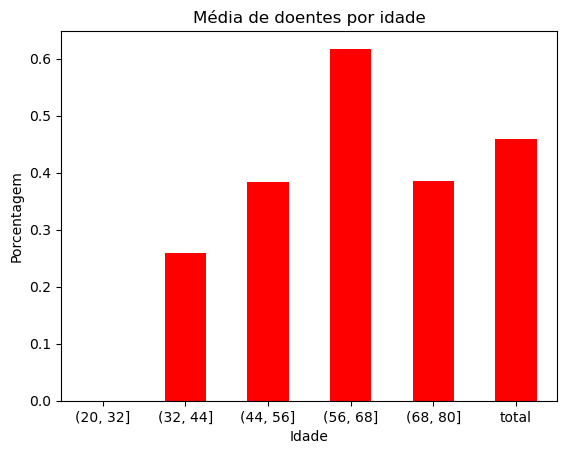

In [126]:
tab2['média de doentes'].plot.bar(color= 'red', title='Média de doentes por idade', 
                                       xlabel='Idade', ylabel='Porcentagem', rot=0)

<Axes: title={'center': 'Chance de doentes por idade'}, xlabel='Idade', ylabel='Quantidade'>

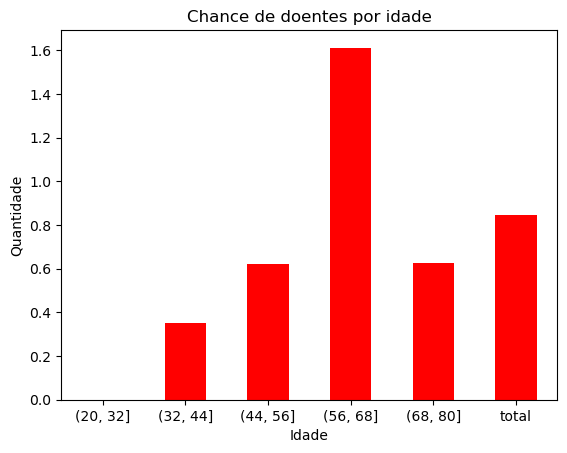

In [127]:
tab2['odds'].plot.bar(color= 'red', title='Chance de doentes por idade', 
                                       xlabel='Idade', ylabel='Quantidade', rot=0)